In [29]:
!pip install scikit-learn

In [1]:
!pip install seaborn

In [4]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

<h1>Import dataset</h1>

In [5]:
data_df = pd.read_csv("./Data.csv")

In [6]:
data_df.head()

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes


In [7]:
data_df.shape

(10, 4)

<h1>Data Imputation(Missing data replacement)</h1>

In [8]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    10 non-null     object 
 1   Age        9 non-null      float64
 2   Salary     9 non-null      float64
 3   Purchased  10 non-null     object 
dtypes: float64(2), object(2)
memory usage: 452.0+ bytes


In [9]:
for col in data_df.columns:
    missing_data = data_df[col].isna().sum()
    missing_percent = missing_data/len(data_df)*100
    print(f"Column: {col} has {missing_percent}% missing data")

Column: Country has 0.0% missing data
Column: Age has 10.0% missing data
Column: Salary has 10.0% missing data
Column: Purchased has 0.0% missing data


<Axes: >

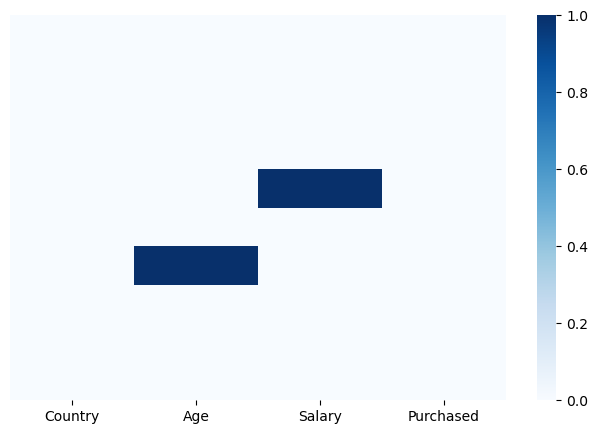

In [16]:
# use seaborn to specify on heatmap
fig, ax = plt.subplots(figsize = (8, 5))
sns.heatmap(data_df.isna(), cmap = "Blues", yticklabels = False) 

#age and salary have missing data

In [17]:
data_df.head()

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes


### Split dataset into x and y
* Input x: input data, put into ML models to be trained (cols: Country, Age, ....)
* Output y: target to be predicted by ML (like output of purchase)

In [63]:
x = data_df.iloc[:, :-1] #take all the rows, 3 first cols without the last col
x

,Country,Age,Salary
0,France,44.0,72000.0
1,Spain,27.0,48000.0
2,Germany,30.0,54000.0
3,Spain,38.0,61000.0
4,Germany,40.0,NaN
5,France,35.0,58000.0
6,Spain,NaN,52000.0
7,France,48.0,79000.0
8,Germany,50.0,83000.0
9,France,37.0,67000.0


In [74]:

x = np.array(x)
x

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, nan],
       ['France', 35.0, 58000.0],
       ['Spain', nan, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

In [76]:
y = data_df.iloc[:, -1]
y = np.array(y)
y

array(['No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes'],
      dtype=object)

In [59]:
import sklearn

In [60]:
from sklearn.impute import SimpleImputer #fill in missing data using certain strategy

In [33]:
#Create an instance of Class SimpleImputer : np.nan is the empty value in the dataset

In [78]:
imputer = SimpleImputer (missing_values = np.nan, strategy = "mean") #mean: medium vals, thay thế missing vals bằng mean của từng cột một
imputer.fit(x[:, 1:3]) #only caculate the vals of Age and Salary cols
x[:, 1:3] = imputer.transform(x[:, 1:3]) #transform will replace & return the new updated columns

In [79]:
x

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, 63777.77777777778],
       ['France', 35.0, 58000.0],
       ['Spain', 38.77777777777778, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

# Encode categorical data 
#### ML models cannot process with non-numarical vals, so we need to convert all the data to numerical form
#### Encode independent variable (x)

In [82]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer (transformers = [('encoder', OneHotEncoder(), [0])], remainder = "passthrough")   
x = ct.fit_transform(x)
x

#col 0 has been trans into vector with 3 cols 
#explain: there are 3 countries: France, Spain, Ger

array([[1.0, 0.0, 1.0, 0.0, 0.0, 44.0, 72000.0],
       [0.0, 1.0, 0.0, 0.0, 1.0, 27.0, 48000.0],
       [0.0, 1.0, 0.0, 1.0, 0.0, 30.0, 54000.0],
       [0.0, 1.0, 0.0, 0.0, 1.0, 38.0, 61000.0],
       [0.0, 1.0, 0.0, 1.0, 0.0, 40.0, 63777.77777777778],
       [1.0, 0.0, 1.0, 0.0, 0.0, 35.0, 58000.0],
       [0.0, 1.0, 0.0, 0.0, 1.0, 38.77777777777778, 52000.0],
       [1.0, 0.0, 1.0, 0.0, 0.0, 48.0, 79000.0],
       [0.0, 1.0, 0.0, 1.0, 0.0, 50.0, 83000.0],
       [1.0, 0.0, 1.0, 0.0, 0.0, 37.0, 67000.0]], dtype=object)

### Encode dependent variable(y)

In [83]:
y

array(['No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes'],
      dtype=object)

In [85]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [86]:
y

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 1])

### Splitting the dataset (x = data, y = output) into the Training set and Test set
## We don't use all the data for training but splitting bcause if we use all the data, there will be no data left for testing the accuracy of the model

In [88]:
from sklearn.model_selection import train_test_split
np.random.seed(42)    #can be use to gen the random rate for test_size
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [91]:
x_train #8 for training

array([[1.0, 0.0, 1.0, 0.0, 0.0, 35.0, 58000.0],
       [1.0, 0.0, 1.0, 0.0, 0.0, 44.0, 72000.0],
       [1.0, 0.0, 1.0, 0.0, 0.0, 48.0, 79000.0],
       [0.0, 1.0, 0.0, 1.0, 0.0, 30.0, 54000.0],
       [1.0, 0.0, 1.0, 0.0, 0.0, 37.0, 67000.0],
       [0.0, 1.0, 0.0, 1.0, 0.0, 40.0, 63777.77777777778],
       [0.0, 1.0, 0.0, 0.0, 1.0, 38.0, 61000.0],
       [0.0, 1.0, 0.0, 0.0, 1.0, 38.77777777777778, 52000.0]],
      dtype=object)

In [93]:
x

array([[1.0, 0.0, 1.0, 0.0, 0.0, 44.0, 72000.0],
       [0.0, 1.0, 0.0, 0.0, 1.0, 27.0, 48000.0],
       [0.0, 1.0, 0.0, 1.0, 0.0, 30.0, 54000.0],
       [0.0, 1.0, 0.0, 0.0, 1.0, 38.0, 61000.0],
       [0.0, 1.0, 0.0, 1.0, 0.0, 40.0, 63777.77777777778],
       [1.0, 0.0, 1.0, 0.0, 0.0, 35.0, 58000.0],
       [0.0, 1.0, 0.0, 0.0, 1.0, 38.77777777777778, 52000.0],
       [1.0, 0.0, 1.0, 0.0, 0.0, 48.0, 79000.0],
       [0.0, 1.0, 0.0, 1.0, 0.0, 50.0, 83000.0],
       [1.0, 0.0, 1.0, 0.0, 0.0, 37.0, 67000.0]], dtype=object)

In [95]:
y_train

array([1, 0, 1, 0, 1, 1, 0, 0])

In [97]:
data_df

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [99]:
x_test


array([[0.0, 1.0, 0.0, 1.0, 0.0, 50.0, 83000.0],
       [0.0, 1.0, 0.0, 0.0, 1.0, 27.0, 48000.0]], dtype=object)

In [100]:
y_test

array([0, 1])

#### 2 features Age and Salary is so diff -> tạo sự áp đảo của cột salary -> cần đưa về cùng 1 scale 

### Feature scaling: scale all the features in the same scale to prevent 1 feature dominates the others & then neglected by ML Model
### FS MUST be done AFTER splitting Training & Test sets
### There are 2 main Feature Scaling Technique: Standardisation & Normmalisation
* Standardisation: This makes the dataset, center at 0 i.e mean at 0, and changes the standard deviation value to 1.
Usage: apply all the situations
* Normalisation: This makes the dataset in range [0, 1]
Usage: apply when the all the features in the data set have the normal distribution

In [102]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train[:, 3:] = sc.fit_transform(x_train[:, 3:])

In [104]:
x_train

array([[1.0, 0.0, 1.0, -0.5773502691896258, -0.5773502691896258,
        -0.7529426005471074, -0.6260377781240922],
       [1.0, 0.0, 1.0, -0.5773502691896258, -0.5773502691896258,
        1.008453807952985, 1.013042950055349],
       [1.0, 0.0, 1.0, -0.5773502691896258, -0.5773502691896258,
        1.7912966561752484, 1.8325833141450698],
       [0.0, 1.0, 0.0, 1.7320508075688774, -0.5773502691896258,
        -1.7314961608249366, -1.0943465576039326],
       [1.0, 0.0, 1.0, -0.5773502691896258, -0.5773502691896258,
        -0.3615211764359758, 0.4276569757055486],
       [0.0, 1.0, 0.0, 1.7320508075688774, -0.5773502691896258,
        0.22561095973072173, 0.05040823668012205],
       [0.0, 1.0, 0.0, -0.5773502691896258, 1.7320508075688774,
        -0.16581046438040992, -0.274806193514212],
       [0.0, 1.0, 0.0, -0.5773502691896258, 1.7320508075688774,
        -0.013591021670525248, -1.328500947343853]], dtype=object)

In [106]:
x_test[:, 3:] = sc.transform(x_test[:, 3:])                 #chỉ cần transform thôi vì bên trên đã fit cho x_train rồi 

In [107]:
x_test

array([[0.0, 1.0, 0.0, 1.0, 0.0, 50.000000000000014, 83000.0],
       [0.0, 1.0, 0.0, 5.551115123125783e-17, 1.0, 27.000000000000007,
        48000.0]], dtype=object)